# Recommender Systems(RS)

- understand, how RS work
- build a RS using PySaprk

## how RS work

- 推荐系统的应用场景
    - Online retial (在线零售)
    - Jobs (找工作)
    - Connecttions/Friends (社交网络朋友推荐)
    - Movies/Music/Videos/Books/Articles (内容推荐)
    - Ads (广告推荐)
- 不同类型的推荐技术
    - Popularity Bsaed RS (基于流行度(热度)的)
    - Content Based RS (基于内容的)
    - Collaborative Filtering Based RS (基于协同过滤的)
    - Hybrid RS (基于多种技术混合的)
    - Association Rule Mining Based RS (基于关联规则挖掘的)

### Popularity Based RS

&emsp;&emsp;基于热度/流行度的推荐系统是最简单也最容易实现的，它是根据近期的历史数据，找最畅销的商品/浏览量最高的博客/下载次数最多的音乐....,然后向所有的用户推荐一样的东西，有时候这样做也有不错的效果，但是也有致命的缺陷，它完全忽略用户之间的差异，对所有的用户千篇一律，忽视了用户的个性化需求。

--------------------------------

### Content Based RS

&emsp;&emsp;基于内容的推荐，就是根据用户之前喜欢的内容向用户推荐相似的东西。比如用户之前喜欢的一首歌曲，我们可以从这个用户喜欢的歌曲里面获得一些信息，比如歌手的名字,歌曲的风格，前奏的长度,,,,等等。然后我们可以根据这些信息就算任何和这首歌相似的歌曲推荐给用户。

- 优点
   -  增加了个性化体验
   - 原理简单易懂
- 缺点
   - 用户的特征属性信息可能存在偏差
   - 完全基于历史信息，不能根据用户新的偏好推荐

- 计算用户属性和内容属性之间的相似性
    - Euclidean Distance
    - Cosine Similarity

In [7]:
import pandas as pd
movie_data = pd.DataFrame({'movie_id':list(range(10)), 
                                               'horror':[0.01, 0, 0.2, 0.6, 0.9, 0, 0, 0.7, 0.1, 0],
                                               'art':[0.3, 0.45, 0, 0.3, 0.2, 0.3, 0.3, 0, 0.15, 0.3],
                                               'comedy':[0.8, 0.8, 0.8, 0, 0, 0.8, 0.8, 0, 0.8, 0.85],
                                               'action':[0, 0, 0, 0.6, 0.7, 0, 0, 0.8, 0, 0],
                                               'drama':[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4, 0.5, 0.8],
                                               'commercial':[0.9, 0.65, 0.7, 0.3, 0.9, 0.9, 0.9, 0.5, 0.6, 0.9]})
movie_data

,movie_id,horror,art,comedy,action,drama,commercial
0,0,0.01,0.30,0.80,0.0,0.5,0.90
1,1,0.00,0.45,0.80,0.0,0.5,0.65
2,2,0.20,0.00,0.80,0.0,0.5,0.70
3,3,0.60,0.30,0.00,0.6,0.5,0.30
4,4,0.90,0.20,0.00,0.7,0.5,0.90
5,5,0.00,0.30,0.80,0.0,0.5,0.90
6,6,0.00,0.30,0.80,0.0,0.5,0.90
7,7,0.70,0.00,0.00,0.8,0.4,0.50
8,8,0.10,0.15,0.80,0.0,0.5,0.60
9,9,0.00,0.30,0.85,0.0,0.8,0.90


##### User Profile 

- 用户偏好信息

In [8]:
user_data = pd.DataFrame({'user_id':['1a92'], 'horror':[0.251], 'art':[0.23], 'comedy':[0.565], 'action':[0.21],'drama':[0.52], 'commercial':[0.725]})
user_data

,user_id,horror,art,comedy,action,drama,commercial
0,1a92,0.251,0.23,0.565,0.21,0.52,0.725


#### Euclidean Distance

$$ d(V^1, V^2) = \sqrt{(v^1_{i} - v^2_{i})^2 +.....+ (v^1_{n} - v^2_{n})^2}  $$

#### Cossine Similarity

$$  sim(V^1, V^2) = cos(\theta) = V^1*V^2 / |V^1|*|V^2|   $$


-------------------------------

### Collaborative Filtering Based RS(CFRS)

&emsp;&emsp;协同过滤与基于内容的推荐刚好相反，它不是寻找用户偏好和商品属性之间的相似性。在进行推荐任务时，它会找到和用户最相似的用户或用户群体，利用趣味相投，拥有共同经验的群体喜好来推荐用户感兴趣的信息，每个用户的选择行为都会被记录下来，帮助他人进行筛选信息。

- user item(info|behavior) matrix
- explicit feedback
- implicit feedback
- nearest neighbors based CF
- missing values
- latent factor based CF

### user item(behavior)matrix = (UI Matrix)
- 记录用户的一些行为（反馈）信息，数值记录用户对某种东西的喜好程度，缺失：没有和用户发生过交互
- 特点：
    - 矩阵稀疏，通常会有更多的列
    - 数值，表示用户对某个thing的反馈
- 反馈信息：
    - Explicit Feedback(明确反馈)(这类数据较少)
        - 电影评分
        - Yes or No
    - implicit Feedback(隐式反馈)(主要从用户活动中推测用户喜爱程度)
        - 在购物时，加入购物车的行为
        - 反复浏览的行为
        - 收藏的行为

In [11]:
from numpy import nan
user_matrix = pd.DataFrame({'user_id' : list(range(10)),
                                                'item1': [1, nan, 1, nan, 3, nan, 1, 1, 5, 1],
                                                'item2': [4, 3, 4, 2, 2, 1, 4, 4, 5, nan],
                                                'item3': [nan, 3, 1, nan, 1, nan, nan, nan, 5, 3],
                                                'item4': [nan, nan, nan, nan, 2, nan, 3, nan, 1, nan],
                                                'item5': [5, nan, 5, 5, 5, 5, 3, 5, 5, 1],
                                                'itemn': [nan, 1, 2, nan, nan, nan, 5, nan, nan, 1]})
user_matrix

,user_id,item1,item2,item3,item4,item5,itemn
0,0,1.0,4.0,NaN,NaN,5.0,NaN
1,1,NaN,3.0,3.0,NaN,NaN,1.0
2,2,1.0,4.0,1.0,NaN,5.0,2.0
3,3,NaN,2.0,NaN,NaN,5.0,NaN
4,4,3.0,2.0,1.0,2.0,5.0,NaN
5,5,NaN,1.0,NaN,NaN,5.0,NaN
6,6,1.0,4.0,NaN,3.0,3.0,5.0
7,7,1.0,4.0,NaN,NaN,5.0,NaN
8,8,5.0,5.0,5.0,1.0,5.0,NaN
9,9,1.0,NaN,3.0,NaN,1.0,1.0


### Nearest Neighbors Base CFRS

- 1.find K-nearest neighbors 
- 2.recommender for active user

In [13]:
toy_data = user_matrix.copy()
toy_data

,user_id,item1,item2,item3,item4,item5,itemn
0,0,1.0,4.0,NaN,NaN,5.0,NaN
1,1,NaN,3.0,3.0,NaN,NaN,1.0
2,2,1.0,4.0,1.0,NaN,5.0,2.0
3,3,NaN,2.0,NaN,NaN,5.0,NaN
4,4,3.0,2.0,1.0,2.0,5.0,NaN
5,5,NaN,1.0,NaN,NaN,5.0,NaN
6,6,1.0,4.0,NaN,3.0,3.0,5.0
7,7,1.0,4.0,NaN,NaN,5.0,NaN
8,8,5.0,5.0,5.0,1.0,5.0,NaN
9,9,1.0,NaN,3.0,NaN,1.0,1.0


##### 举个例子：给user_id = 0，的用户做推荐(数据上表)

- 1.找到与user_id = 0,用户最邻近的k=3个用户，使用Jaccard 相似度：

$$ sim(x, y) = |Rx \cap Ry| / |Rx \cup Ry|  $$

##### user_0 , user_1的Jaccard 相似度：

- $ |R_{user_0} \cap R_{user_1}|  = 1 $, (两个用户都评分的项目)
- $ |R_{user_0} \cup R_{user_1}|  = 5 $, (两个用户评分项目并集)
- $ Jaccard_{sim} = \frac{1}{5} = 0.2 $

##### Jaccard sim:
- $ Jaccard_{sim}(0, 1) = 0.2 $
- $ Jaccard_{sim}(0, 2) = 0.6 $
- $ Jaccard_{sim}(0, 3) = 0.667 $
- $ Jaccard_{sim}(0, 4) = 0.0.333 $
- $ Jaccard_{sim}(0, 5) = 0.25 $
- $ Jaccard_{sim}(0, 6) = 0.333 $
- $ Jaccard_{sim}(0, 7) = 0.2 $
- $ Jaccard_{sim}(0, 8) = 0.6 $
- $ Jaccard_{sim}(0, 9) = 0.4 $
#### k= 3, nearest users:
- user_3
- user_2
- user_8

- 2.找到最邻近用户后，向user_0推荐
     - 推荐原则：前k个最邻近的用户中，评价最高的item,极有可能也是user_0喜欢的。

In [15]:
toy_data.iloc[[0, 3, 2, 8], :]

,user_id,item1,item2,item3,item4,item5,itemn
0,0,1.0,4.0,NaN,NaN,5.0,NaN
3,3,NaN,2.0,NaN,NaN,5.0,NaN
2,2,1.0,4.0,1.0,NaN,5.0,2.0
8,8,5.0,5.0,5.0,1.0,5.0,NaN


根据结果，可以向user_0推荐item_3

 ### Jaccard similarity的局限性
&emsp;&emsp;使用Jaccar 相似度来衡量用户之间的相似度，也有一些致命的缺陷，它只考虑了用户共同交互行为，忽视了用户对具体item的评价，当两个用户的交互行为是一样的，但是一个评价很高，一个很低。这种情况下，两个用户的Jaccard similarity很高，但是其实两个用户的价值观是存在很多的偏差的。

### Missing Values Process(缺失值处理)

UI Matrix存在大量的缺失值
- 0填充
- 均值填充

*对UI Matrix 进行缺失值处理后，也可以使用Euclidean Distance 和 Cosine Similarity来进行用户间的相似性度量*


----------------------------

### Latent Factor Based CF(collaborative filtering)

&emsp;&emsp;也是通过UI Matrix(user item(info/hehavior) matrix)来构建推荐系统,但是不是寻找最近的邻居,而是通过举证分解，将UI matrix分解为两个latent factor matrices.
- Users latent factor matrix
- Items latent factor matrix

### Review matrix decomposition

- Matrix A : 

$$ A = \left[\begin{array}{c c c c}
             1 & 2 & 3 & 5 \\
             2 & 4 & 8 & 12 \\
             3 & 6 & 7 & 13
            \end{array}\right]  $$
            
- Matrix A的所有列都可以通过第一列和第三列的线性组合表示：

$$ A1 = 1\times A1 + 0 \times A3 $$
$$ A2 = 2\times A1 + 0 \times A3 $$
$$ A3 = 0\times A1 + 1 \times A3 $$
$$ A4 = 2\times A1 + 1 \times A3 $$

- 根据上面的方程组，可以分解出两小矩阵X, Y，两个矩阵的乘积=Matrix A:

$$ X = \left[\begin{array}{c c}
             1 & 3 \\
             2 & 8  \\
             3 & 7 
            \end{array}\right]  ;      
      Y = \left[\begin{array}{c c c c}
              1 & 2 & 0 & 2\\
              0 & 0 & 1 & 1
              \end{array}\right]$$
              
- $ A = X \times Y $

$$ A = \left[\begin{array}{c c}
             1 & 3 \\
             2 & 8  \\
             3 & 7 
            \end{array}\right]  \times 
            \left[\begin{array}{c c c c}
              1 & 2 & 0 & 2\\
              0 & 0 & 1 & 1
              \end{array}\right]
          =  \left[\begin{array}{c c c c}
             1 & 2 & 3 & 5 \\
             2 & 4 & 8 & 12 \\
             3 & 6 & 7 & 13
            \end{array}\right]  $$

### UI matrix 分解：

在推荐系统中latent factor是通过机器学习优化算法得到的，并非简单的举证分解，例如最小二乘，梯度下降
- user latent matrix
- item latent matrix

scipy支持多种矩阵分解方法
 - LU
 - SVD
 - QR

In [31]:
UI_matrix = toy_data.fillna(0).iloc[:, 1:].values 

UI_matrix

array([[1., 4., 0., 0., 5., 0.],
       [0., 3., 3., 0., 0., 1.],
       [1., 4., 1., 0., 5., 2.],
       [0., 2., 0., 0., 5., 0.],
       [3., 2., 1., 2., 5., 0.],
       [0., 1., 0., 0., 5., 0.],
       [1., 4., 0., 3., 3., 5.],
       [1., 4., 0., 0., 5., 0.],
       [5., 5., 5., 1., 5., 0.],
       [1., 0., 3., 0., 1., 1.]])

In [30]:
from scipy.linalg import lu, svd, qr
# LU分解
p, user_mat_lu, item_mat_lu = lu(UI_matrix)
# SVD 分解
user_mat_svd, s, item_mat_svd = svd(UI_matrix)
# QR 分解
user_mat_qr, item_mat_qr = qr(UI_matrix)

# user factor matrix LU
# UFM : user factor matrix
# IFM : item factor matrix
UFM_lu = pd.DataFrame({'user_id':list(range(10)),
                                         'user_f1':user_mat_lu[:, 0],
                                         'user_f2':user_mat_lu[:, 1],
                                         'user_f3':user_mat_lu[:, 2],
                                         'user_f4':user_mat_lu[:, 3],
                                         'user_f5':user_mat_lu[:, 4],
                                         'user_f6':user_mat_lu[:, 5]})
IFM_lu = pd.DataFrame({'item1':item_mat_lu[:, 0],
                                        'item2':item_mat_lu[:, 1],
                                        'item3':item_mat_lu[:, 2],
                                        'item4':item_mat_lu[:, 3],
                                        'item5':item_mat_lu[:, 4],
                                        'item6':item_mat_lu[:, 5]})

UFM_svd = pd.DataFrame({'user_id':list(range(10)),
                                            'user_f1':user_mat_svd[:, 0],
                                            'user_f2':user_mat_svd[:, 1],
                                            'user_f3':user_mat_svd[:, 2],
                                            'user_f4':user_mat_svd[:, 3],
                                            'user_f5':user_mat_svd[:, 4],
                                            'user_f6':user_mat_svd[:, 5]})
IFM_svd = pd.DataFrame({'item1':item_mat_svd[:, 0],
                                          'item2':item_mat_svd[:, 1],
                                          'item3':item_mat_svd[:, 2],
                                          'item4':item_mat_svd[:, 3],
                                          'item5':item_mat_svd[:, 4],
                                          'item6':item_mat_svd[:, 5]})

UFM_qr = pd.DataFrame({'user_id':list(range(10)),
                                          'user_f1':user_mat_qr[:, 0],
                                          'user_f2':user_mat_qr[:, 1],
                                          'user_f3':user_mat_qr[:, 2],
                                          'user_f4':user_mat_qr[:, 3],
                                          'user_f5':user_mat_qr[:, 4],
                                          'user_f6':user_mat_qr[:, 5]})
IFM_qr = pd.DataFrame({'item1':item_mat_qr[:, 0],
                                         'item2':item_mat_qr[:, 1],
                                         'item3':item_mat_qr[:, 2],
                                         'item4':item_mat_qr[:, 3],
                                         'item5':item_mat_qr[:, 4],
                                         'item6':item_mat_qr[:, 5]})

## Latent Factor Matrix Visualization

- UFM :User Factor Matrix
    - LU
    - SVD
    - QR
- IFM : Item Factor Matrix
    - LU
    - SVD
    - QR

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

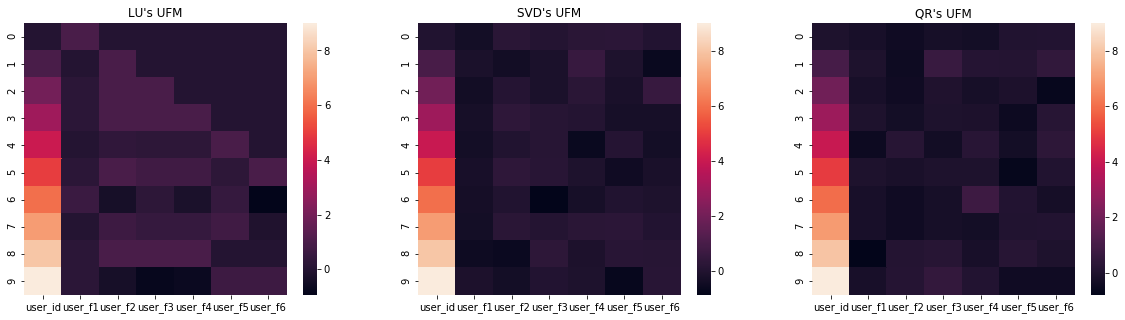

In [48]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("LU's UFM")
sns.heatmap(UFM_lu)
plt.subplot(1, 3, 2)
plt.title("SVD's UFM")
sns.heatmap(UFM_svd)
plt.subplot(1, 3, 3)
plt.title("QR's UFM")
sns.heatmap(UFM_qr)

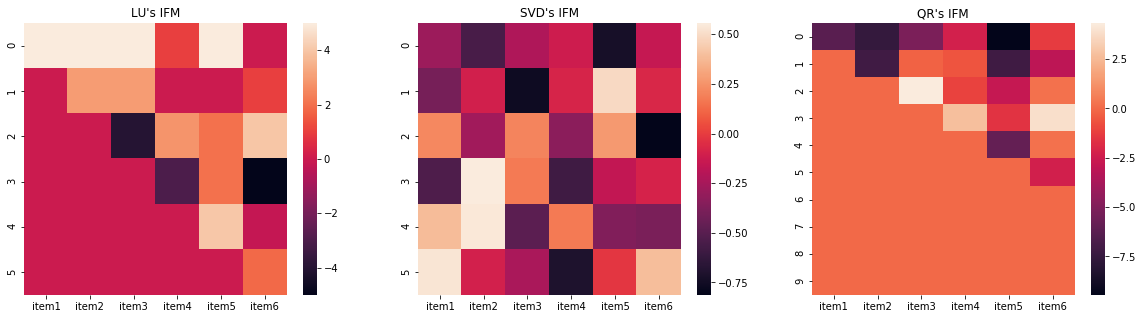

In [49]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.title("LU's IFM")
sns.heatmap(IFM_lu)
plt.subplot(1, 3, 2)
plt.title("SVD's IFM")
sns.heatmap(IFM_svd)
plt.subplot(1, 3, 3)
plt.title("QR's IFM")
sns.heatmap(IFM_qr)

#### 协同过滤的局限性

- Cold Start Problem:冷启动，对于新用户不能很好的推荐
- Missing values:没有和用户发生过交互的item,永远不会被推荐
- Cannot recommend new or unrated items: 新的item和没有和用户发生过交互的item,永远不会被推荐
- Poor Accuracy: 准确率低

## Hybrid Recommender Systems(混合推荐系统)

&emsp;&emsp;顾名思义，混合RS就是综合多个推荐系统，向用户提供更有意义，更有价值的推荐。正如上面所说的，单个的推荐系统总有这样那样的局限性，但是结合起来，可以克服其中的一些限制，因此能够为用户推荐更有用，更加个性化的东西。混合RS可以以特定的方式构建，以满足不同业务的需求。

### HRS的构建方法：
- 组合多个推荐系统的输出给用户推荐
- 串行组合法，例如：利用基于内容的推荐优势，将其作为基于协作过滤推荐的输入。

<font color='red'> 关于推荐系统的科普就到这里，接下来：用PySpark实现一个简单的推荐系统 </font>